In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_DIR_PATH = os.path.join('..', '..', 'data')

def laod_data(file_name):
  file_path = os.path.join(DATA_DIR_PATH, file_name)
  return pd.read_csv(file_path, header=0)

In [3]:
df = laod_data('bookmark_train_data.csv')
print(len(df))
df.head(3)

199


,ncode,title,category,bookmark_cat,created_at,updated_at,sum_char_count,sum_new_line_count,sum_talk_char_count,sum_word_count,...,wc_その他-間投,wc_名詞-固有名詞-人名-名,wc_助動詞,wc_助詞-接続助詞,wc_名詞-代名詞-一般,wc_副詞-一般,wc_名詞-接続詞的,wc_名詞-固有名詞-組織,wc_記号-句点,rating
0,n4366gd,雷帝の軌跡 ～俺だけ使える【雷魔術】で最強の魔術師を目指します～,ハイファンタジー〔ファンタジー〕,1,1.586338e+09,1.593468e+09,92340,3840,28950,992220,...,0,30,4680,2250,900,570,0,0,1830,3.0
1,n7336gg,星斬りの剣士,ハイファンタジー〔ファンタジー〕,1,1.590714e+09,1.593338e+09,77880,4140,4950,863400,...,0,90,4320,1620,1590,390,0,60,2280,4.0
2,n9677fw,落ちこぼれ国を出る〜実は世界で４人目の付与術師だった件について〜,ハイファンタジー〔ファンタジー〕,1,1.575176e+09,1.593429e+09,59880,3090,10230,628470,...,0,240,2490,1260,450,360,30,0,930,3.0


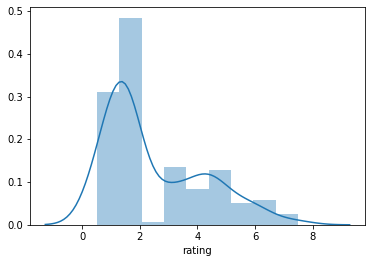

In [51]:
sns.distplot(df['rating'])

In [4]:
#df.iloc[:, 6:10]
#sns.distplot(df.iloc[:, 6:10])

In [5]:
#sns.pairplot(df.iloc[:, 6:10])
df.iloc[:, 4:10].head(3)

,created_at,updated_at,sum_char_count,sum_new_line_count,sum_talk_char_count,sum_word_count
0,1.586338e+09,1.593468e+09,92340,3840,28950,992220
1,1.590714e+09,1.593338e+09,77880,4140,4950,863400
2,1.575176e+09,1.593429e+09,59880,3090,10230,628470


0    3078.0
1    2596.0
Name: avg_char_count, dtype: float64


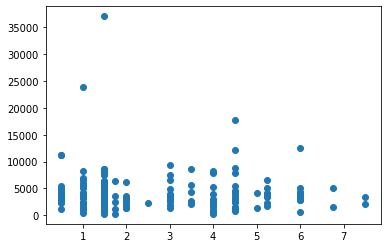

In [6]:
#col_idx = 6
#col_idx = 64
col_idx = 10
print(df.iloc[:, col_idx].head(2))
#plt.scatter(x=df.iloc[:, col_idx], y=df.iloc[:, -1])
plt.scatter(x=df.iloc[:, -1], y=df.iloc[:, col_idx])

In [7]:
cols = [col for col in df.columns if col.find('kw_') == -1]
print(cols)

['ncode', 'title', 'category', 'bookmark_cat', 'created_at', 'updated_at', 'sum_char_count', 'sum_new_line_count', 'sum_talk_char_count', 'sum_word_count', 'avg_char_count', 'avg_new_line_count', 'avg_talk_char_count', 'avg_word_count', 'wc_名詞-接尾-一般', 'wc_名詞-サ変接続', 'wc_連体詞', 'wc_助詞-副助詞／並立助詞／終助詞', 'wc_助詞-係助詞', 'wc_名詞-一般', 'wc_名詞-非自立-一般', 'wc_助詞-格助詞-引用', 'wc_名詞-固有名詞-地域-一般', 'wc_記号-一般', 'wc_助詞-副助詞', 'wc_接続詞', 'wc_名詞-引用文字列', 'wc_名詞-副詞可能', 'wc_助詞-特殊', 'wc_名詞-ナイ形容詞語幹', 'wc_接頭詞-名詞接続', 'wc_助詞-連体化', 'wc_名詞-形容動詞語幹', 'wc_助詞-終助詞', 'wc_名詞-接尾-助数詞', 'wc_名詞-代名詞-縮約', 'wc_副詞-助詞類接続', 'wc_助詞-格助詞-連語', 'wc_助詞-副詞化', 'wc_助詞-並立助詞', 'wc_名詞-接尾-形容動詞語幹', 'wc_動詞-接尾', 'wc_名詞-接尾-特殊', 'wc_形容詞-自立', 'wc_記号-アルファベット', 'wc_記号-括弧開', 'wc_名詞-数', 'wc_名詞-接尾-人名', 'wc_名詞-固有名詞-人名-一般', 'wc_名詞-固有名詞-人名-姓', 'wc_記号-括弧閉', 'wc_助詞-格助詞-一般', 'wc_形容詞-非自立', 'wc_名詞-特殊-助動詞語幹', 'wc_フィラー', 'wc_名詞-動詞非自立的', 'wc_接頭詞-動詞接続', 'wc_記号-読点', 'wc_名詞-固有名詞-一般', 'wc_接頭詞-形容詞接続', 'wc_感動詞', 'wc_名詞-非自立-形容動詞語幹', 'wc_動詞-自立', 'wc_接頭詞-数接続', 'wc_動詞-非自立', 'wc_名詞-非自立-助動詞

In [8]:
from sklearn.preprocessing import LabelEncoder

cat_le = LabelEncoder()
cat_le.fit(df['category'])


def data_preprocess(df):
  new_df = df.drop(['ncode', 'title', 'bookmark_cat'], axis=1)

  new_df['category'] = cat_le.transform(new_df['category'])

  return new_df

In [9]:
df2 = data_preprocess(df)
df2.head(3)

,category,created_at,updated_at,sum_char_count,sum_new_line_count,sum_talk_char_count,sum_word_count,avg_char_count,avg_new_line_count,avg_talk_char_count,...,wc_その他-間投,wc_名詞-固有名詞-人名-名,wc_助動詞,wc_助詞-接続助詞,wc_名詞-代名詞-一般,wc_副詞-一般,wc_名詞-接続詞的,wc_名詞-固有名詞-組織,wc_記号-句点,rating
0,6,1.586338e+09,1.593468e+09,92340,3840,28950,992220,3078.0,128.0,965.0,...,0,30,4680,2250,900,570,0,0,1830,3.0
1,6,1.590714e+09,1.593338e+09,77880,4140,4950,863400,2596.0,138.0,165.0,...,0,90,4320,1620,1590,390,0,60,2280,4.0
2,6,1.575176e+09,1.593429e+09,59880,3090,10230,628470,1996.0,103.0,341.0,...,0,240,2490,1260,450,360,30,0,930,3.0


In [10]:
cols = [col for col in df2.columns if col.find('kw_') == -1 and col.find('wc_') == -1]
print(cols)

['category', 'created_at', 'updated_at', 'sum_char_count', 'sum_new_line_count', 'sum_talk_char_count', 'sum_word_count', 'avg_char_count', 'avg_new_line_count', 'avg_talk_char_count', 'avg_word_count', 'rating']


In [11]:
df3 = df2.loc[:, cols]
df3.head(3)

,category,created_at,updated_at,sum_char_count,sum_new_line_count,sum_talk_char_count,sum_word_count,avg_char_count,avg_new_line_count,avg_talk_char_count,avg_word_count,rating
0,6,1.586338e+09,1.593468e+09,92340,3840,28950,992220,3078.0,128.0,965.0,33074.0,3.0
1,6,1.590714e+09,1.593338e+09,77880,4140,4950,863400,2596.0,138.0,165.0,28780.0,4.0
2,6,1.575176e+09,1.593429e+09,59880,3090,10230,628470,1996.0,103.0,341.0,20949.0,3.0


In [12]:
df3.describe()

,category,created_at,updated_at,sum_char_count,sum_new_line_count,sum_talk_char_count,sum_word_count,avg_char_count,avg_new_line_count,avg_talk_char_count,avg_word_count,rating
count,199.000000,1.990000e+02,1.990000e+02,1.990000e+02,199.000000,199.000000,1.990000e+02,199.000000,199.000000,199.000000,199.000000,199.000000
mean,6.135678,1.491545e+09,1.569293e+09,1.219007e+05,5549.698492,19564.673367,1.292796e+06,4063.356784,184.989950,652.155779,43093.216080,2.473618
std,1.362070,6.976047e+07,3.744248e+07,1.108186e+05,5275.382787,25778.586090,1.172684e+06,3693.953684,175.846093,859.286203,39089.453912,1.721520
min,0.000000,1.287239e+09,1.428070e+09,7.290000e+03,360.000000,0.000000,5.712000e+04,243.000000,12.000000,0.000000,1904.000000,0.500000
25%,6.000000,1.443003e+09,1.558076e+09,6.706500e+04,2700.000000,2070.000000,7.182300e+05,2235.500000,90.000000,69.000000,23941.000000,1.500000
50%,6.000000,1.500453e+09,1.588648e+09,1.006800e+05,4650.000000,10230.000000,1.045530e+06,3356.000000,155.000000,341.000000,34851.000000,1.500000
75%,6.000000,1.550689e+09,1.593074e+09,1.493400e+05,6495.000000,26130.000000,1.537650e+06,4978.000000,216.500000,871.000000,51255.000000,4.000000
max,10.000000,1.590714e+09,1.593688e+09,1.111500e+06,50610.000000,163740.000000,1.167525e+07,37050.000000,1687.000000,5458.000000,389175.000000,7.500000


In [13]:
df3.corr()

,category,created_at,updated_at,sum_char_count,sum_new_line_count,sum_talk_char_count,sum_word_count,avg_char_count,avg_new_line_count,avg_talk_char_count,avg_word_count,rating
category,1.000000,0.089161,-0.116296,-0.009777,-0.012035,-0.025982,-0.006070,-0.009777,-0.012035,-0.025982,-0.006070,0.062920
created_at,0.089161,1.000000,0.436831,-0.046807,0.002320,0.117564,-0.051647,-0.046807,0.002320,0.117564,-0.051647,-0.257420
updated_at,-0.116296,0.436831,1.000000,-0.023143,-0.017545,0.108230,-0.026096,-0.023143,-0.017545,0.108230,-0.026096,-0.362883
sum_char_count,-0.009777,-0.046807,-0.023143,1.000000,0.939714,0.586732,0.997064,1.000000,0.939714,0.586732,0.997064,-0.024927
sum_new_line_count,-0.012035,0.002320,-0.017545,0.939714,1.000000,0.467301,0.917724,0.939714,1.000000,0.467301,0.917724,-0.063215
sum_talk_char_count,-0.025982,0.117564,0.108230,0.586732,0.467301,1.000000,0.600152,0.586732,0.467301,1.000000,0.600152,-0.049632
sum_word_count,-0.006070,-0.051647,-0.026096,0.997064,0.917724,0.600152,1.000000,0.997064,0.917724,0.600152,1.000000,-0.019427
avg_char_count,-0.009777,-0.046807,-0.023143,1.000000,0.939714,0.586732,0.997064,1.000000,0.939714,0.586732,0.997064,-0.024927
avg_new_line_count,-0.012035,0.002320,-0.017545,0.939714,1.000000,0.467301,0.917724,0.939714,1.000000,0.467301,0.917724,-0.063215
avg_talk_char_count,-0.025982,0.117564,0.108230,0.586732,0.467301,1.000000,0.600152,0.586732,0.467301,1.000000,0.600152,-0.049632


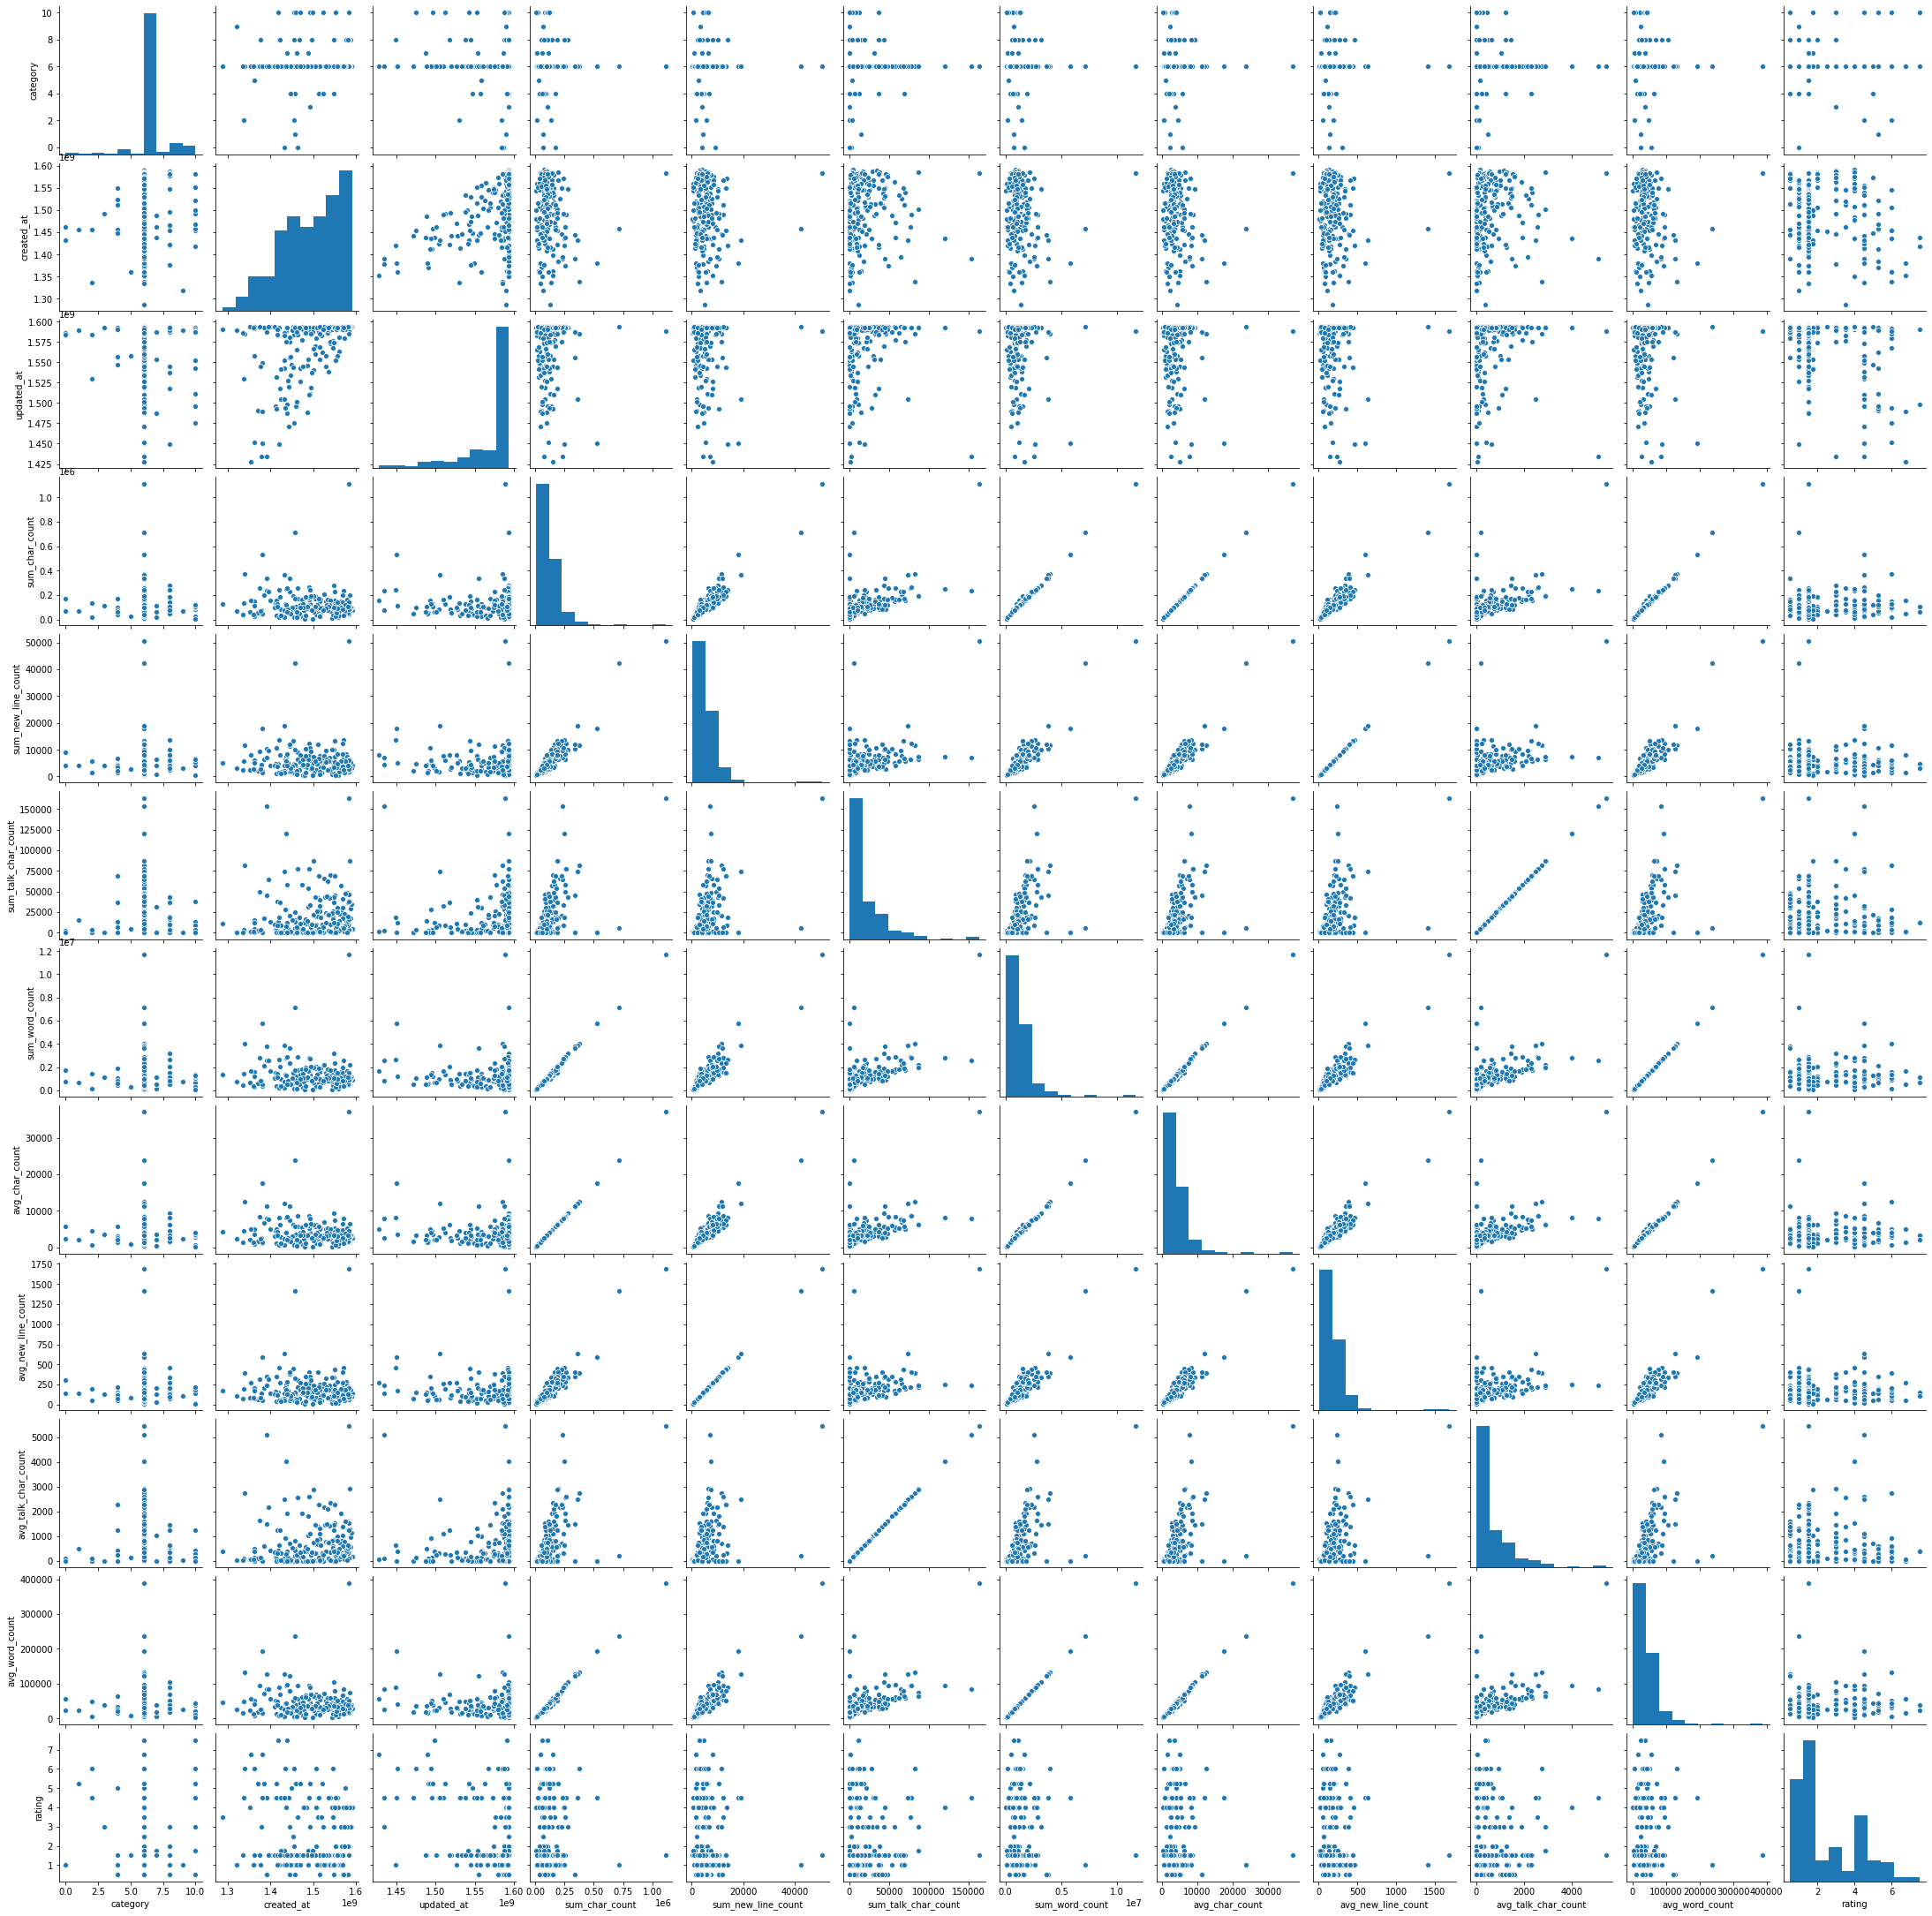

In [14]:
sns.pairplot(df3)

In [15]:
#cols = [col for col in df2.columns if col.find('kw_') == -1 and col.find('wc_') == -1]
cols = [col for col in df2.columns if col.find('wc_') != -1]
print(len(cols), cols)

68 ['wc_名詞-接尾-一般', 'wc_名詞-サ変接続', 'wc_連体詞', 'wc_助詞-副助詞／並立助詞／終助詞', 'wc_助詞-係助詞', 'wc_名詞-一般', 'wc_名詞-非自立-一般', 'wc_助詞-格助詞-引用', 'wc_名詞-固有名詞-地域-一般', 'wc_記号-一般', 'wc_助詞-副助詞', 'wc_接続詞', 'wc_名詞-引用文字列', 'wc_名詞-副詞可能', 'wc_助詞-特殊', 'wc_名詞-ナイ形容詞語幹', 'wc_接頭詞-名詞接続', 'wc_助詞-連体化', 'wc_名詞-形容動詞語幹', 'wc_助詞-終助詞', 'wc_名詞-接尾-助数詞', 'wc_名詞-代名詞-縮約', 'wc_副詞-助詞類接続', 'wc_助詞-格助詞-連語', 'wc_助詞-副詞化', 'wc_助詞-並立助詞', 'wc_名詞-接尾-形容動詞語幹', 'wc_動詞-接尾', 'wc_名詞-接尾-特殊', 'wc_形容詞-自立', 'wc_記号-アルファベット', 'wc_記号-括弧開', 'wc_名詞-数', 'wc_名詞-接尾-人名', 'wc_名詞-固有名詞-人名-一般', 'wc_名詞-固有名詞-人名-姓', 'wc_記号-括弧閉', 'wc_助詞-格助詞-一般', 'wc_形容詞-非自立', 'wc_名詞-特殊-助動詞語幹', 'wc_フィラー', 'wc_名詞-動詞非自立的', 'wc_接頭詞-動詞接続', 'wc_記号-読点', 'wc_名詞-固有名詞-一般', 'wc_接頭詞-形容詞接続', 'wc_感動詞', 'wc_名詞-非自立-形容動詞語幹', 'wc_動詞-自立', 'wc_接頭詞-数接続', 'wc_動詞-非自立', 'wc_名詞-非自立-助動詞語幹', 'wc_名詞-非自立-副詞可能', 'wc_名詞-接尾-副詞可能', 'wc_名詞-接尾-助動詞語幹', 'wc_名詞-固有名詞-地域-国', 'wc_名詞-接尾-サ変接続', 'wc_形容詞-接尾', 'wc_名詞-接尾-地域', 'wc_その他-間投', 'wc_名詞-固有名詞-人名-名', 'wc_助動詞', 'wc_助詞-接続助詞', 'wc_名詞-代名詞-一般', 'wc_副詞-一般', 'wc_名詞-接続詞的', 'wc_名詞-固有名詞-組

In [18]:
import warnings
warnings.filterwarnings('ignore')

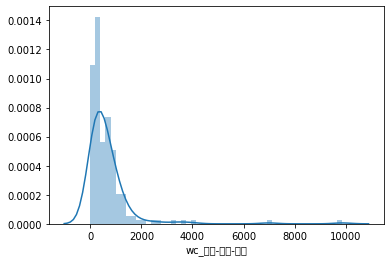

In [20]:
for col in cols[:1]:
    #print(col)
    sns.distplot(df2[col])

In [26]:
#df3 = df2.loc[:, cols]
df3 = df2.loc[:, cols[:5]]
df3.head(3)

,wc_名詞-接尾-一般,wc_名詞-サ変接続,wc_連体詞,wc_助詞-副助詞／並立助詞／終助詞,wc_助詞-係助詞
0,420,1020,660,540,2010
1,150,1320,690,270,1920
2,270,1230,210,30,1170


In [27]:
df3.describe()

,wc_名詞-接尾-一般,wc_名詞-サ変接続,wc_連体詞,wc_助詞-副助詞／並立助詞／終助詞,wc_助詞-係助詞
count,199.000000,199.000000,199.000000,199.000000,199.000000
mean,655.628141,2106.331658,629.698492,400.854271,2804.321608
std,988.393494,2723.968642,525.495350,424.049470,2199.491313
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,930.000000,270.000000,150.000000,1485.000000
50%,420.000000,1530.000000,510.000000,300.000000,2370.000000
75%,780.000000,2460.000000,825.000000,510.000000,3390.000000
max,9870.000000,27840.000000,4500.000000,3330.000000,20190.000000


In [28]:
df3.corr()

,wc_名詞-接尾-一般,wc_名詞-サ変接続,wc_連体詞,wc_助詞-副助詞／並立助詞／終助詞,wc_助詞-係助詞
wc_名詞-接尾-一般,1.000000,0.806726,0.518755,0.380330,0.703459
wc_名詞-サ変接続,0.806726,1.000000,0.680419,0.584936,0.839755
wc_連体詞,0.518755,0.680419,1.000000,0.797625,0.880620
wc_助詞-副助詞／並立助詞／終助詞,0.380330,0.584936,0.797625,1.000000,0.774451
wc_助詞-係助詞,0.703459,0.839755,0.880620,0.774451,1.000000


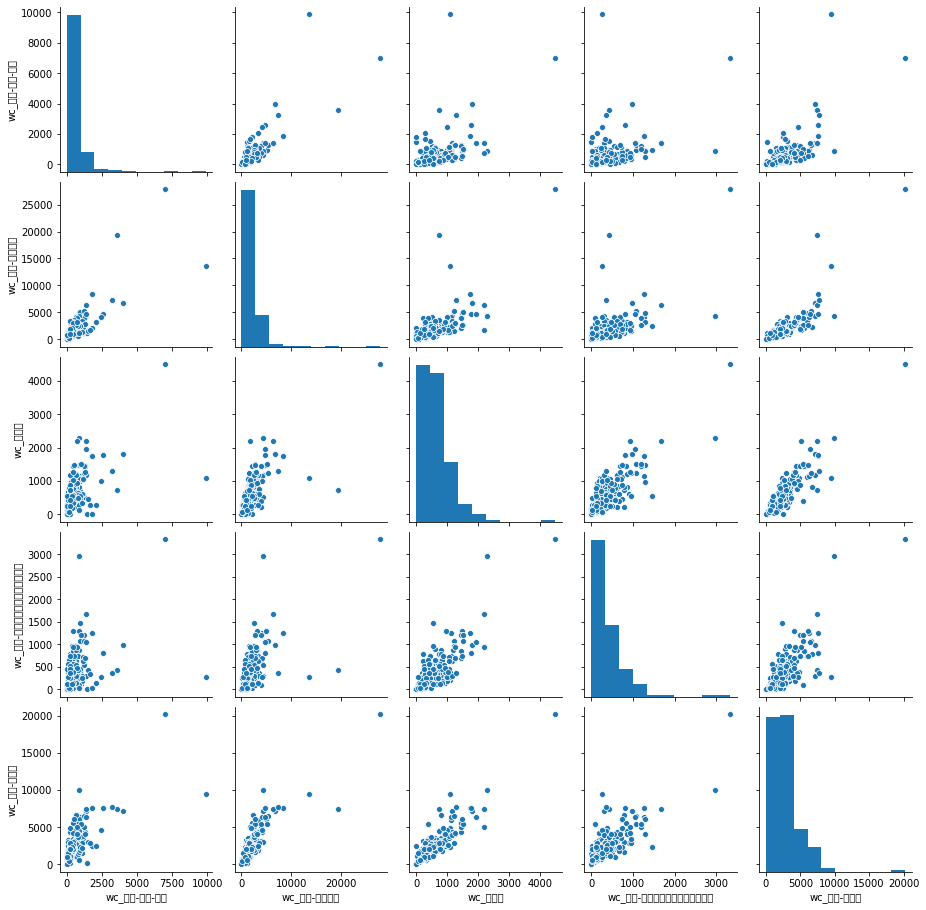

In [29]:
sns.pairplot(df3)

In [31]:
import datetime

In [43]:
# print(datetime.datetime.now().isoformat(), 'Start')

# sns.PairGrid(df3)
# sns.set()

# print(datetime.datetime.now().isoformat(), 'End')

2020-07-16T22:46:29.728740 Start
wc_名詞-接尾-一般
wc_名詞-サ変接続
wc_連体詞
2020-07-16T22:46:30.004702 End


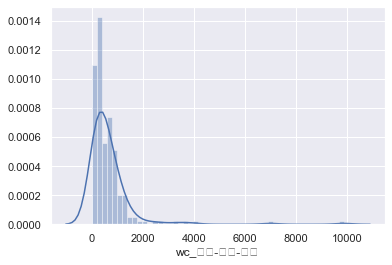

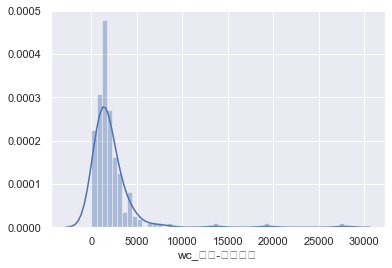

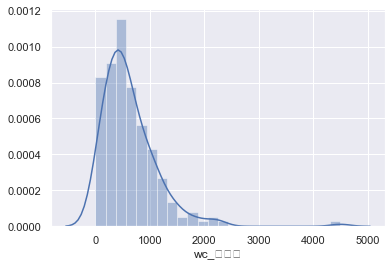

<Figure size 432x288 with 0 Axes>

In [45]:
print(datetime.datetime.now().isoformat(), 'Start')

#for col in cols:
for col in cols[:3]:
    print(col)
    sns.distplot(df2[col])
    plt.figure()

print(datetime.datetime.now().isoformat(), 'End')